#### To-Do
1. Identify cells in frame
2. Find reference images for different stages - get shape of chromosomes for comparison: https://stackoverflow.com/questions/55529371/opencv-shape-matching-between-two-similar-shapes

#### Proposed Algorithm:
1. Get input frame
2. Identify cells
3. Segment chromosome areas of cells to get shape
4. Compare shapes to reference shape
5. Draw box and label cells

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui

#### Segment nuclues from reference images

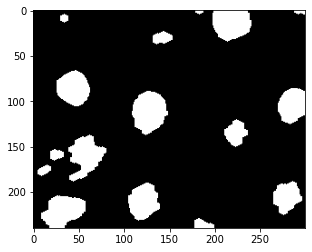

In [28]:
interphase_ref = cv2.imread('interphase_ref.jpg')
#interphase_ref2 = cv2.imread('interphase_ref2.jpg')

interphase_ref = cv2.resize(interphase_ref, (400,320))

#G = cv2.cvtColor(interphase_ref, cv2.COLOR_BGR2GRAY)
G2 = cv2.cvtColor(interphase_ref2, cv2.COLOR_BGR2GRAY)

#ret,thresh = cv2.threshold(G, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh2 = cv2.threshold(G2, 127, 255, cv2.THRESH_BINARY_INV)

shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

Close = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, shape, iterations=2)
Open = cv2.morphologyEx(Close, cv2.MORPH_OPEN, shape, iterations=2)

test = Open[65:110,25:65]

test = cv2.resize(test, (100,100))

#cv2.imshow("gray", G)
#cv2.imshow("thresh", thresh)
cv2.imshow("gray2", G2)
cv2.imshow("thresh2", thresh2)
cv2.imshow("open", Open)
cv2.imshow("test", test)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(Open,cmap='gray')

#### Open video

In [23]:
# Video capture from a file:
Video = cv2.VideoCapture("mitosiscell360.mp4")
(check, I) = Video.read()
(check2, I2) = Video.read()
(check3, I3) = Video.read()

#cv2.imshow("frame",I)
#cv2.imshow("frame2", I2)
#cv2.imshow("frame3", I3)

count = int(0)

while check:
    ret,thresh = cv2.threshold(I[:,:,2], 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    dilated = cv2.dilate(thresh, shape, iterations=2)
    Close = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, shape)
    cut = cv2.bitwise_and(I, I, mask=Close)
    
    cv2.imshow("mask", Close)
    cv2.imshow("frame", cut)
    #cv2.imshow("og", I)
    
    # This delays for 1ms while waiting for a key to be pressed
    key = cv2.waitKey(100)

    # if the 'q' key is pressed, quit:
    if key == ord("q"):
         break

    # Next Frame:
    (check, I) = Video.read()

Video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Segment nuclues from video input

- Binarization on red channel

0.00047775917949444136


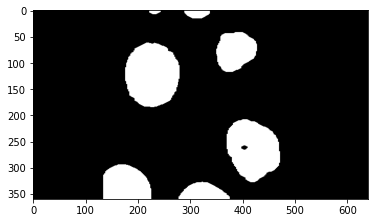

In [17]:
#gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

#H = cv2.equalizeHist(gray)

Video = cv2.VideoCapture("mitosiscell360.mp4")
(check, I) = Video.read()

#ret,thresh = cv2.threshold(I[:,:,2], 100, 255, cv2.THRESH_BINARY)
ret,othresh = cv2.threshold(I[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilated = cv2.dilate(othresh, shape, iterations=3)

Close = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, shape)

test2 = cv2.resize(Close[60:185,175:290], (100,100))

diff = cv2.matchShapes(test,test2,1, 0.0)

print(diff)

cv2.imshow("dilate", dilated)
cv2.imshow("close", Close)
cv2.imshow("test", test)
cv2.imshow("test2", test2)
#cv2.imshow("gray", gray)
#cv2.imshow("thresh", thresh)
cv2.imshow("otsu", othresh)
#cv2.imshow("equalised", H)
Video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(Close, cmap='gray')

- Colored Based

In [9]:
Video = cv2.VideoCapture("mitosiscell360.mp4")
(check, I) = Video.read()

hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

b = I[:,:,0]
g = I[:,:,1]
r = I[:,:,2]

UpperLimit = (0,0,255)
LowerLimit = (0,0,50)

B = cv2.inRange(I, LowerLimit, UpperLimit)

shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilated = cv2.dilate(B, shape, iterations=5)

Close = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, shape, iterations=2)
#Open = cv2.morphologyEx(Close, cv2.MORPH_OPEN, shape, iterations=2)

cut = cv2.bitwise_and(I, I, mask=Close)

cv2.imshow("image", I)
#cv2.imshow("hsv", hsv)
#cv2.imshow("blue", b)
#cv2.imshow("green", g)
#cv2.imshow("red", r)
#cv2.imshow("mask", B)
cv2.imshow("dilate", dilated)
cv2.imshow("close", Close)
#cv2.imshow("open", Open)
cv2.imshow("cut",cut)

Video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()